# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading the data

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.shape

(299, 13)

In [3]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Visualizing Data

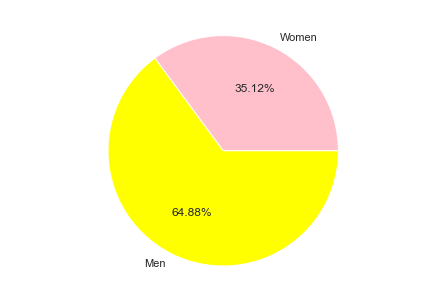

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
genders = ['Women', 'Men']
number = data['sex'].groupby(data['sex']).count()
ax.pie(number, labels = genders,autopct='%1.2f%%', colors = ['pink','yellow'])
plt.show()

In [5]:
def bar_chart(feature):
    survived = data[data['DEATH_EVENT'] == 1][feature].value_counts()
    death = data[data['DEATH_EVENT'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,death])
    df.index = ['Survived','Death']
    df.plot(kind = 'bar',stacked = True)
    

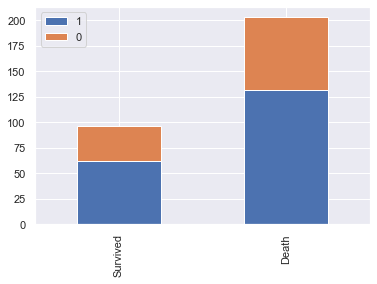

In [6]:
bar_chart('sex')

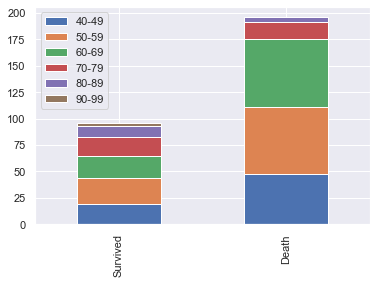

In [7]:
# data['age'].describe()
data['age_group'] = pd.cut(x=data['age'],bins = [40,50,60,70,80,90,100], labels = ['40-49','50-59','60-69','70-79','80-89','90-99'])
bar_chart('age_group')

In [8]:
data = data.drop(['age_group'], axis = 1)

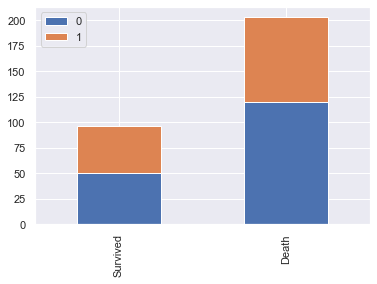

In [9]:
bar_chart('anaemia')

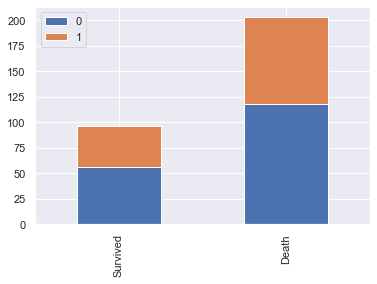

In [10]:
bar_chart('diabetes')

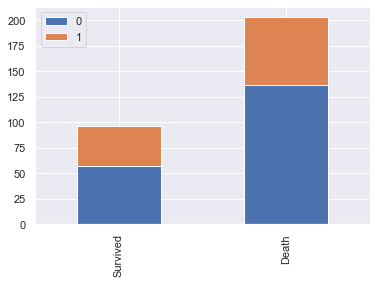

In [11]:
bar_chart('high_blood_pressure')

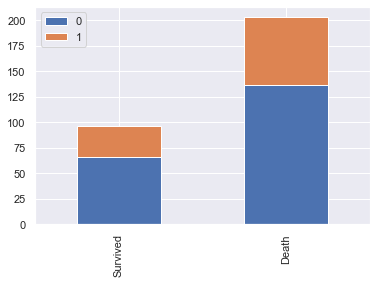

In [12]:
bar_chart('smoking')

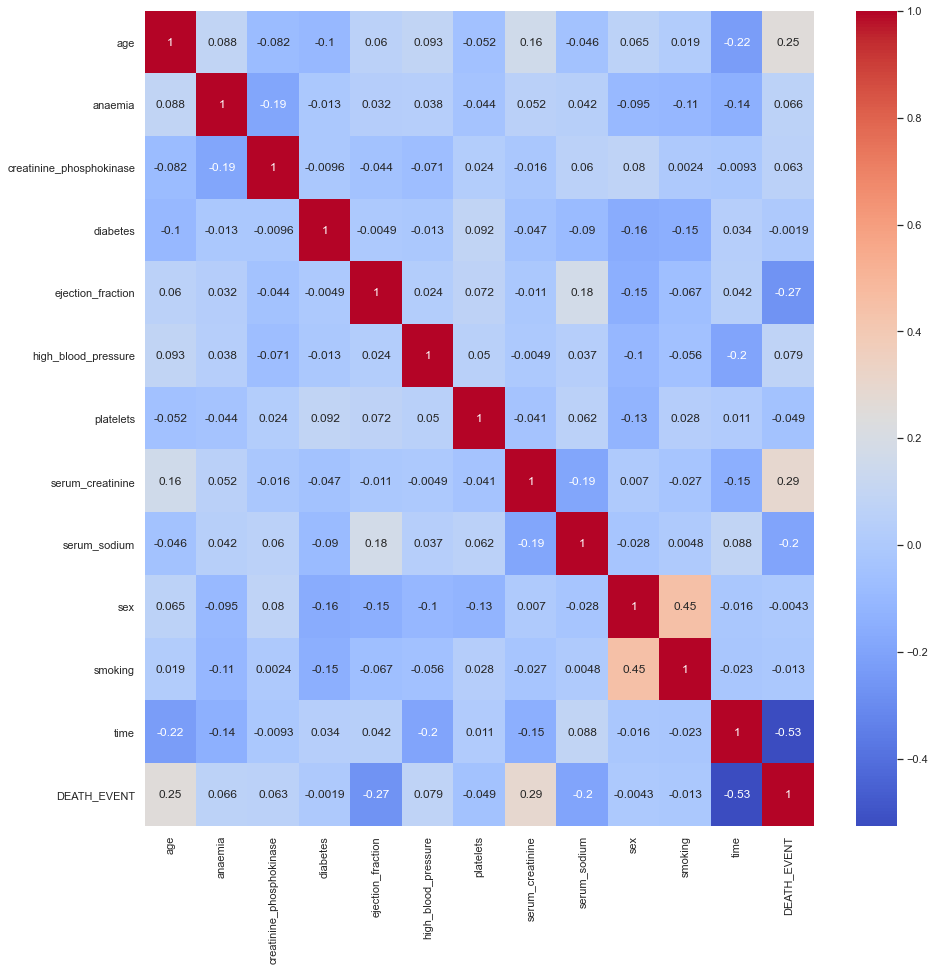

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

# Preprocessing Data

    1. Checking if there are any null values in the dataframe & if there are any categorical values present

In [14]:
data.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

    2. Standardizing the data using the MinMaxScaler()

In [16]:
Min_max = preprocessing.MinMaxScaler(feature_range = (0,1))
Min_max

MinMaxScaler()

In [17]:
data['age'] = Min_max.fit_transform(data[['age']])
data['creatinine_phosphokinase'] = Min_max.fit_transform(data[['creatinine_phosphokinase']])
data['ejection_fraction'] = Min_max.fit_transform(data[['ejection_fraction']])
data['platelets'] = Min_max.fit_transform(data[['platelets']])
data['serum_creatinine'] = Min_max.fit_transform(data[['serum_creatinine']])
data['serum_sodium'] = Min_max.fit_transform(data[['serum_sodium']])
data.head(100)
# data[['age']].shape

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,4,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,6,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,7,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,7,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.327273,1,0.014034,0,0.696970,1,0.235059,0.056180,0.800000,1,0,83,0
96,0.418182,1,0.062644,1,0.166667,1,0.277488,0.089888,0.600000,1,0,83,0
97,0.545455,1,0.004593,0,0.696970,0,0.278700,0.067416,0.657143,0,0,85,0
98,0.363636,1,0.016969,1,0.166667,1,0.355073,0.078652,0.685714,0,0,85,0
